In [16]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import Axes3D

In [25]:
df = pd.read_csv('planets.csv')
exodf = df.loc[(df['st_mass'] <= .6) & (df['st_teff']<=6000)]

In [18]:
ra = exodf['ra']
dec = exodf['dec']
distance = exodf['st_dist']
stellar_mass = exodf['st_mass']
teff = exodf['st_teff']

In [24]:
x = distance * np.cos(dec) *np.cos(ra)
y = distance * np.cos(dec) *np.sin(ra) 
z = distance * np.sin(dec)

In [20]:
from matplotlib import animation

In [21]:
def init():
    ax.scatter(x, y, z, c = teff, cmap= 'plasma', s = 5*((10*stellar_mass)**2), marker = '*')
    ax.set_axis_off()
    return fig,
#in plasma, y
#comma after fig so it doesn't actually spit back out the figure

In [22]:
def animate (i):
    ax.view_init(elev=10., azim = i)
    return fig,
#elev is the angle of your viewpoint; the period turns it into a float so you can divide whenever 
#azim or azimuth is another name for RA

<IPython.core.display.Javascript object>


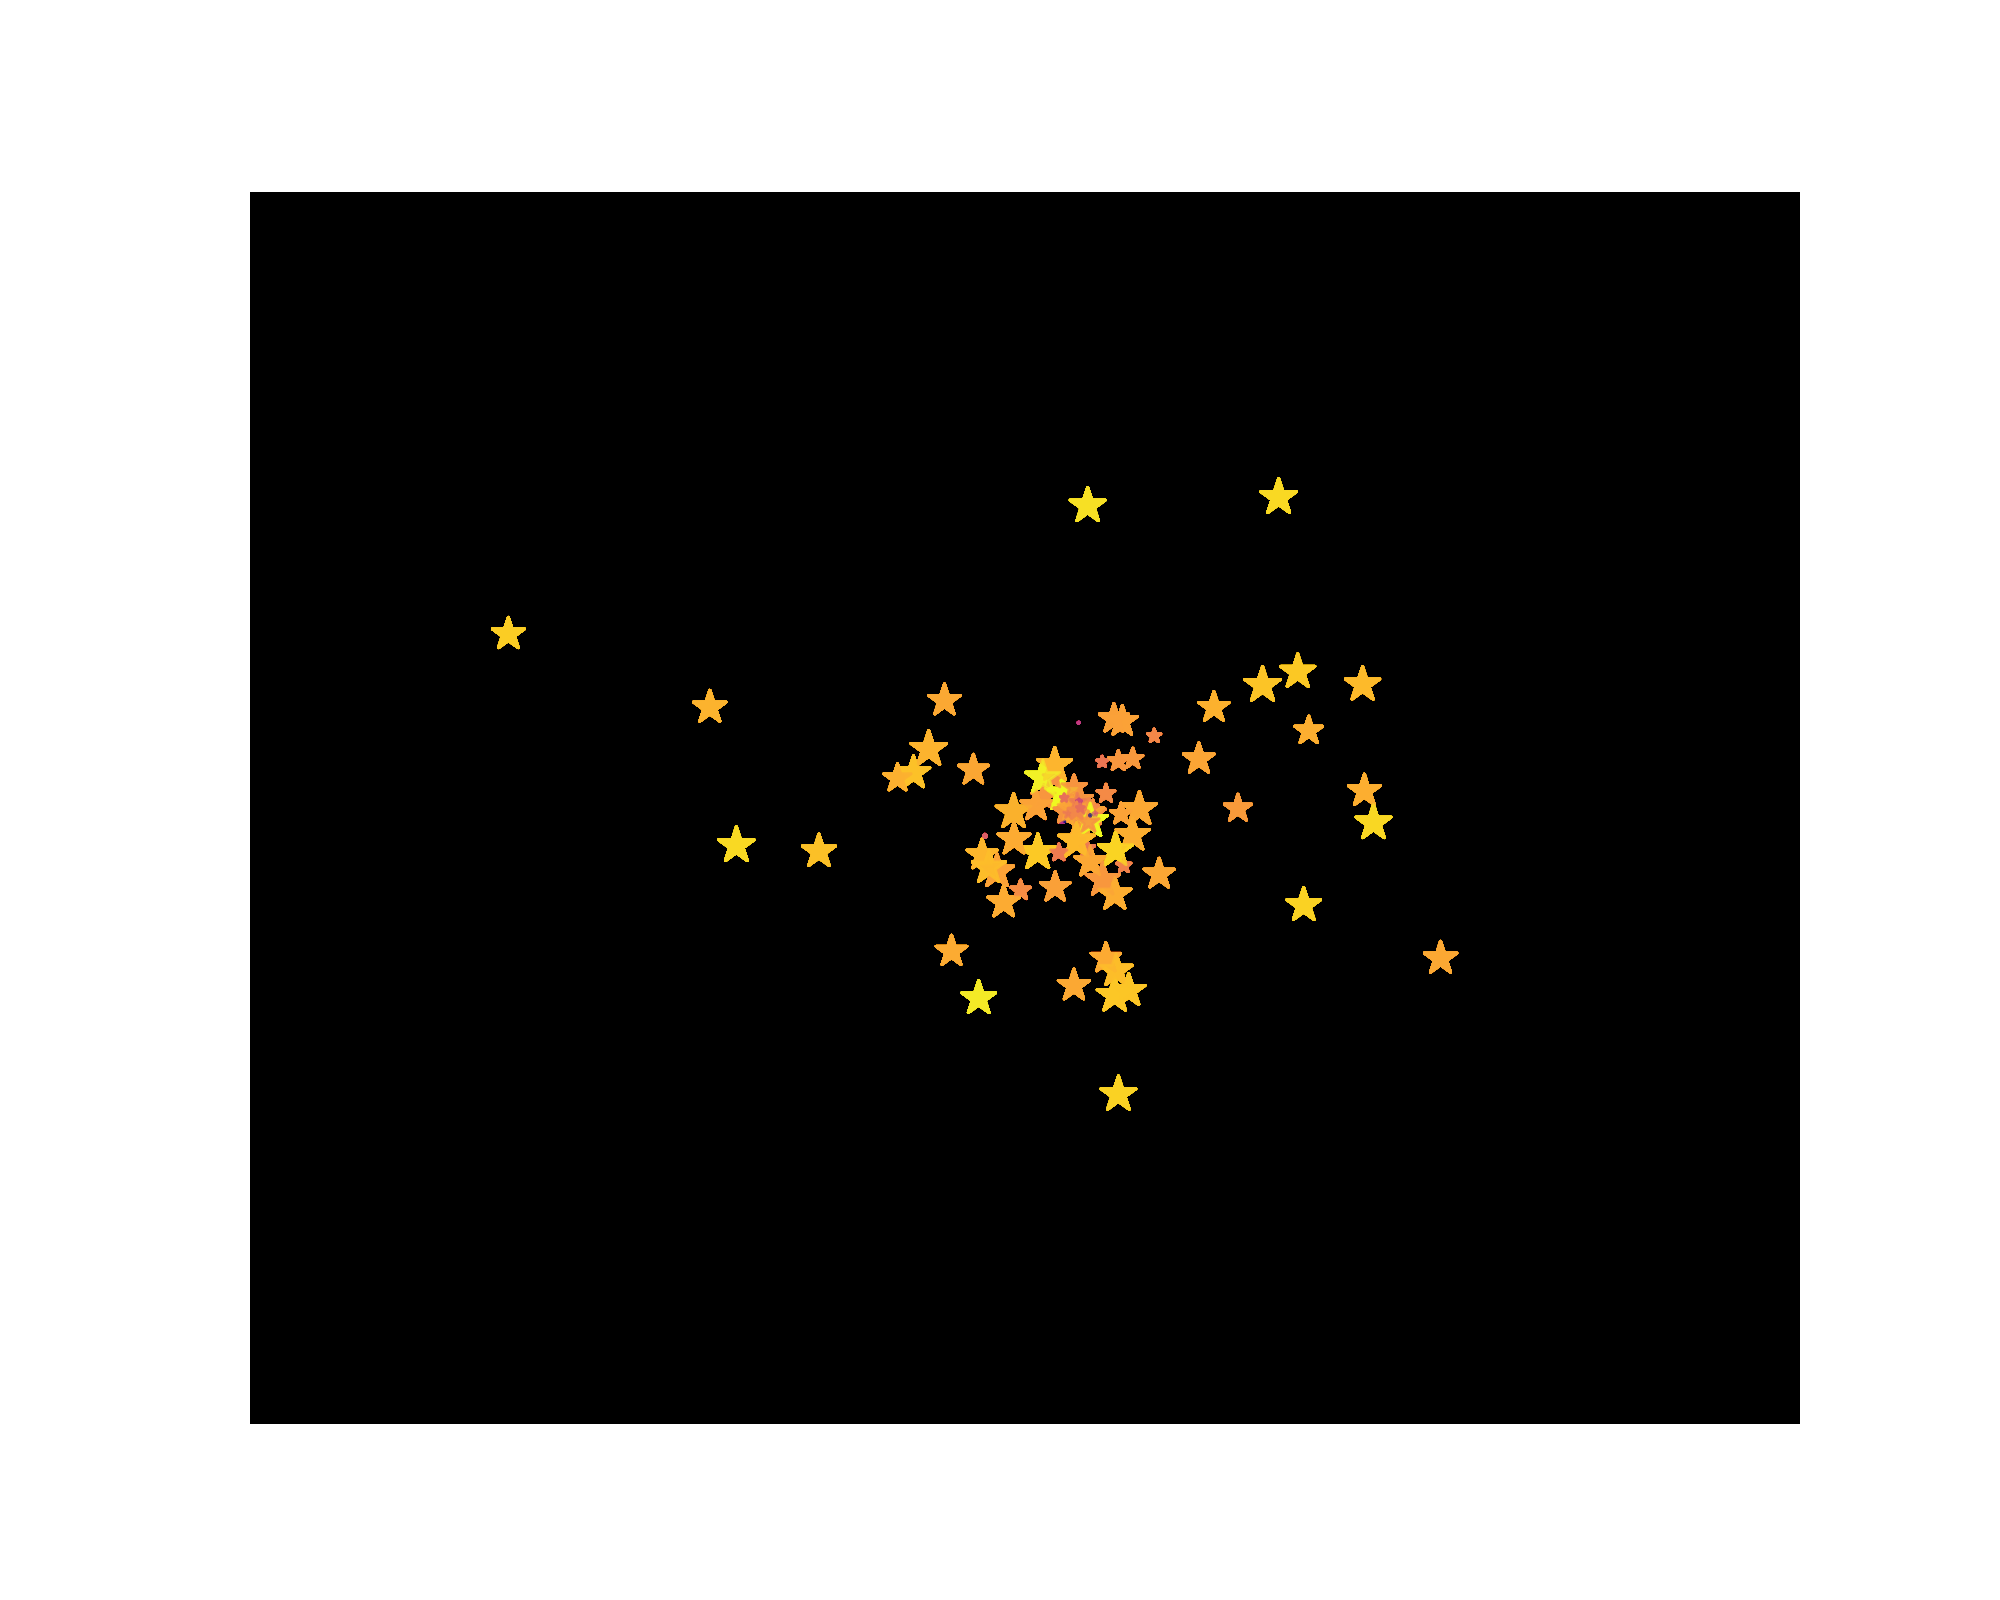

In [8]:
fig = plt.figure(figsize=[10, 8]) 
ax = fig.add_subplot(111, facecolor='black', projection = "3d")
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 360, interval =5, blit = True)
anim.save('exoplanet_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
#111 is the integer subplot specification; first num is columns, second is rows, and third is number of subplots
#fps is frames per second